In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [16]:
# Generate Synthetic Dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.theta = np.random.randn(X_b.shape[1], 1)
        for _ in range(self.n_iterations):
            gradients = 2/X_b.shape[0] * X_b.T.dot(X_b.dot(self.theta) - y)
            self.theta -= self.learning_rate * gradients

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        return X_b.dot(self.theta)

In [19]:
# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

In [20]:
# Linear Regression using Gradient Descent
gd_reg = LinearRegressionGD(learning_rate=0.1, n_iterations=1000)
gd_reg.fit(X_train, y_train)
y_pred_gd = gd_reg.predict(X_test)

In [21]:
# Linear Regression using Least Squares (Ordinary Least Squares)
ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
y_pred_ols = ols_reg.predict(X_test)

In [22]:
# Polynomial Regression
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

In [23]:
# LASSO Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

In [24]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)


In [25]:
# Calculate Metrics
metrics = {
    "Algorithm": ["Gradient Descent", "Least Squares", "Polynomial (2nd Degree)", "LASSO", "Ridge"],
    "MSE": [
        mean_squared_error(y_test, y_pred_gd),
        mean_squared_error(y_test, y_pred_ols),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_ridge)
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_gd),
        mean_absolute_error(y_test, y_pred_ols),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_ridge)
    ],
    "R²": [
        r2_score(y_test, y_pred_gd),
        r2_score(y_test, y_pred_ols),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ]
}

In [26]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Algorithm,MSE,MAE,R²
0,Gradient Descent,0.917753,0.801455,0.652116
1,Least Squares,0.917753,0.801455,0.652116
2,Polynomial (2nd Degree),0.911616,0.795992,0.654442
3,LASSO,0.915539,0.790481,0.652955
4,Ridge,0.912702,0.791227,0.654031


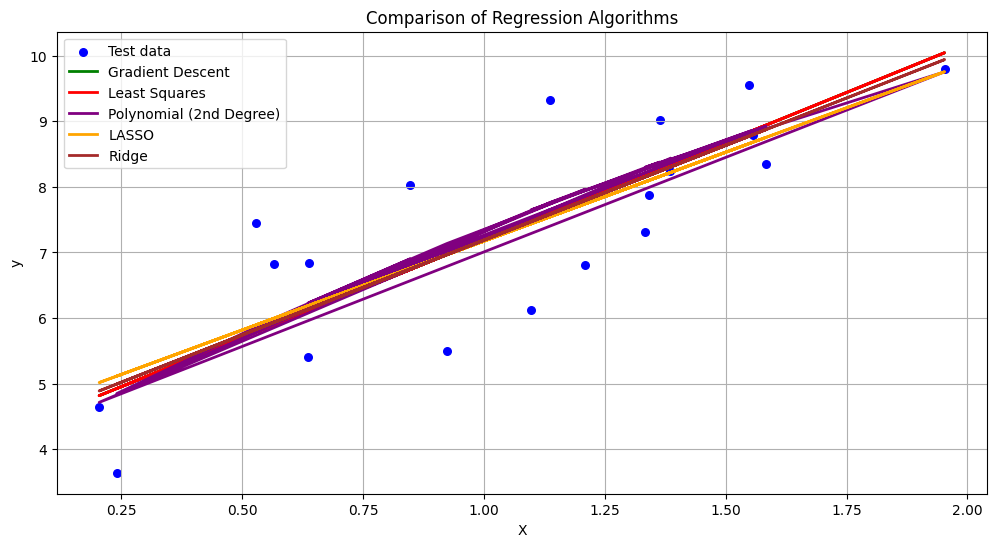

In [29]:
# Plotting predictions and test data
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label="Test data", s=30)

plt.plot(X_test, y_pred_gd, color='green', label="Gradient Descent", linewidth=2)
plt.plot(X_test, y_pred_ols, color='red', label="Least Squares", linewidth=2)
plt.plot(X_test, y_pred_poly, color='purple', label="Polynomial (2nd Degree)", linewidth=2)
plt.plot(X_test, y_pred_lasso, color='orange', label="LASSO", linewidth=2)
plt.plot(X_test, y_pred_ridge, color='brown', label="Ridge", linewidth=2)

plt.title("Comparison of Regression Algorithms")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()